<a href="https://colab.research.google.com/github/Nicola-Taddei/DistributedGP/blob/main/Distributed_GP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RANDOM DRONE POSITION
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation area (e.g., a 2D grid)
area_size = 100
num_drones = 40

# Initial positions of drones (randomly placed within the area)
np.random.seed(42)
drone_positions = np.random.rand(num_drones, 2) * area_size
print("position drone created")

position drone created


In [ ]:
# GRID DRONE POSITION
import numpy as np
import matplotlib.pyplot as plt

# Define the simulation area (e.g., a 2D grid)
area_size = 100
#num drones for row
num_dronesx = 5
#num drones for each column
num_dronesy = 5
#number of drones
num_drones = num_dronesx * num_dronesy
#distance of the grid from the border
margin = 5

x = np.linspace(margin, area_size-margin, num_dronesx)
y = np.linspace(margin, area_size-margin, num_dronesy)
xv, yv = np.meshgrid(x, y)
# Initial positions of drones
drone_positions = np.vstack([xv.ravel(), yv.ravel()]).T
print("position drone created")

position drone created


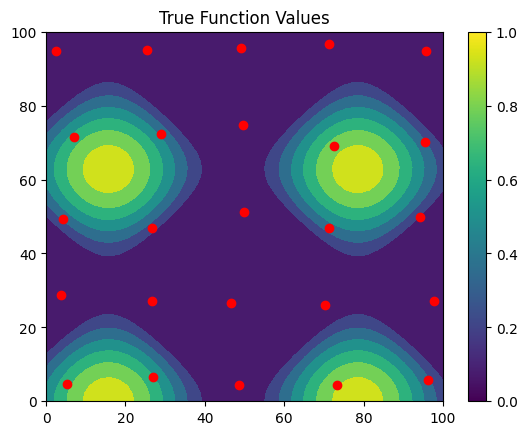

In [ ]:
# Define the true function
def true_function(X):
    val = np.sin(X[:, 0] / 10) + np.cos(X[:, 1] / 10)
    zero = np.zeros_like(val)
    return np.maximum(zero, val)/2

x = np.linspace(0, area_size, 50)
y = np.linspace(0, area_size, 50)
X, Y = np.meshgrid(x, y)
XY = np.vstack([X.ravel(), Y.ravel()]).T

# Calculate the true function values
Z_true = true_function(XY).reshape(X.shape)

# Plot the true values
plt.contourf(X, Y, Z_true, cmap='viridis')
plt.scatter(drone_positions[:, 0], drone_positions[:, 1], c='red', label='Drones')
plt.colorbar()
plt.title('True Function Values')
plt.show()

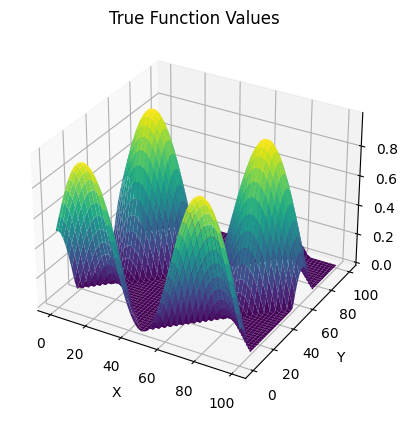

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_true, cmap='viridis')
ax.set_title('True Function Values')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z_true')
plt.show()

In [ ]:
from sklearn.gaussian_process.kernels import RBF
from scipy.linalg import eigh
from scipy.special import hermite

class CustomRBFKernel:
    def __init__(self, sigma_s=1.0, length_scale=10.0):
        self.sigma_s = sigma_s
        self.length_scale = length_scale
        self.Sigma = np.eye(2) * length_scale ** 2

    def __call__(self, X1, X2=None):
        if X2 is None:
            X2 = X1
        print("X ", X1)
        K = np.zeros((X1.shape[0], X2.shape[0]))
        Sigma_inv = np.linalg.inv(self.Sigma)
        for i, x1 in enumerate(X1):
            for j, x2 in enumerate(X2):
                diff = x1 - x2
                K[i, j] = self.sigma_s ** 2 * np.exp(-0.5 * diff.T @ Sigma_inv @ diff)
        return K

def hermite_poly(n, x):
    Hn = hermite(n)
    return Hn(x)

def se_kernel_hermite_expansion(x, x_prime, sigma_s, length_scale, E):
    d = x.shape[0]
    norm_factor = (2 * np.pi * length_scale**2)**(-d/2)
    exp_factor = np.exp(-0.5 * np.sum((x - x_prime)**2) / length_scale**2)
    hermite_sum = 0
    for n in range(E):
        Hn_x = hermite_poly(n, x / length_scale)
        Hn_x_prime = hermite_poly(n, x_prime / length_scale)
        hermite_sum += Hn_x * Hn_x_prime
    return sigma_s**2 * norm_factor * exp_factor * hermite_sum

def kl_expansion(X,kernel, E=5, sigma_s=1.0, length_scale=10.0):
    # Compute the covariance matrix
    # N = X.shape[0]
    # print("N ", N)
    # K = np.array([[se_kernel_hermite_expansion(X[i], X[j], sigma_s, length_scale, E) for j in range(N)] for i in range(N)])
    K = kernel(X)
    # Perform eigenvalue decomposition
    print("K ", K)
    eigenvalues, eigenvectors = eigh(K)
    return eigenvalues, eigenvectors

In [ ]:
# METHOD from http://www.math.iit.edu/~fass/PDKernels.pdf
#used for a RBF kernel
from scipy.special import hermite
sigma_s=1.0
length_scale=10.0

def hermite_poly(n, x):
    Hn = hermite(n)
    return Hn(x)

def eigenvalue_function(n, sigma_s, lenght_scale):
  eps = sigma_s
  a = lenght_scale
  num = eps**(2*n) * a
  den = (a**2 / 2) * (1 + np.sqrt(1 + (2 * eps / a)**2)) + eps**2
  den = den**(n+0.5)

def eigenvalue_function(x, n, sigma_s, lenght_scale):
  eps = sigma_s
  a = lenght_scale
  num1 = (1 + (2 * eps / a)**2)**(1/8)
  num2 = (1 + (2 * eps / a)**2)**(1/4) * a * x
  hn_x = hermite_poly(n, x)
  num3 = np.eps(-1 * ((1 + (2 * eps / a)**2)**(1/2) - 1) * (a*x)**2 /2)
  den = np.sqrt(2**n * np.math.factorial(n))
  return num1 * num2 *hn_x * num3 / den

def kl_expansion(X,kernel, E=5, sigma_s=1.0, length_scale=10.0):
    # Compute the covariance matrix
    for i in range
    return eigenvalues, eigenvectors


In [ ]:
# Nielstron method (We are using it)
# https://boostedml.com/2020/08/the-nystrom-method-for-finding-eigenpairs-of-a-kernel-function.html
from scipy.optimize import fsolve

class CustomRBFKernel:
    def __init__(self, sigma_s=1.0, length_scale=20.0):
        self.sigma_s = sigma_s
        self.length_scale = length_scale
        self.Sigma = np.eye(2) * length_scale ** 2

    def __call__(self, X1, X2=None):
        if X2 is None:
            X2 = X1
        K = np.zeros((X1.shape[0], X2.shape[0]))
        Sigma_inv = np.linalg.inv(self.Sigma)
        for i, x1 in enumerate(X1):
            for j, x2 in enumerate(X2):
                diff = x1 - x2
                K[i, j] = self.sigma_s ** 2 * np.exp(-0.5 * diff.T @ Sigma_inv @ diff)
        return K

kernel = CustomRBFKernel()
class model_E:
  def __init__(self, E, l):
    self.model = []
    self.E = E
    self.l = l
    def equation(p):
        #p musb be numpy array with dimensione (2,l+1)
        lamb = p[0]
        x = p[1:]
        K = kernel(samples_s) / l
        sol = np.zeros(l+1)
        sol[0:l] = K @ x.T - lamb * x.T
        sol[l] = np.linalg.norm(x) - 1
        return tuple([row for row in sol])

    for i in range(E):
      samples_s = np.random.rand(l,2) * area_size
      init_guess = np.zeros(l+1)
      p = fsolve(equation, init_guess)
      self.model.append((samples_s,p))
  def __call__(self, t):
      results = np.zeros((self.E,2))
      for i in range(self.E):
        p = self.model[i][1]
        samples_s = self.model[i][0]
        results[i,1] = (1 / (p[0] * self.l)) * np.sum(kernel(t,samples_s) * p[1:])
        results[i,0] = p[0]
      return results
# model_e = model_E(E, l)
# t = np.zeros(2)
# array = model_e(t)

In [ ]:
class Drone:
    def __init__(self, position, area_size, kernel, num_drones, E, l, sigma2=1e-2):
        self.position = position
        self.area_size = area_size
        self.kernel = kernel
        self.sigma2 = sigma2
        self.X_train = []
        self.y_train = []
        self.E = E
        self.l = l
        self.alpha = np.zeros((self.E, self.E))
        self.beta = np.zeros(self.E)
        self.model_e = model_E(self.E, self.l)
        self.num_drones = num_drones

    def move(self, step_size=1.0):
        angle = np.random.uniform(0, 2 * np.pi)
        self.position[0] += step_size * np.cos(angle)
        self.position[1] += step_size * np.sin(angle)
        self.position[0] = np.clip(self.position[0], 0, self.area_size)
        self.position[1] = np.clip(self.position[1], 0, self.area_size)

    def collect_data(self):
        X_new = self.position.reshape(1, -1)
        y_new = true_function(X_new)
        self.X_train.append(X_new)
        self.y_train.append(y_new)
        return X_new, y_new

    def update_gp(self):
        if len(self.X_train) > 0:
            # to fix, optimization to do
            for i, x in enumerate(self.X_train):
              results = self.model_e(x)
              phi = results[:,1]
              phi_x = phi @ phi.T
              self.alpha += (phi_x / len(self.X_train))
              self.beta += (phi.T * self.y_train[i].flatten() / len(self.X_train))

    def predict(self, X):
      # print("dimensione X ", X.shape)
      predict = np.zeros(X.shape[0])
      for i,x in enumerate(X):
        result = self.model_e(x)
        phi_x = result[:,1]
        predict[i] = phi_x @ np.linalg.inv(self.alpha + self.sigma2 / (len(self.X_train) * self.num_drones)  * np.linalg.inv(np.diag(result[:,0]))) @ self.beta
      return predict

In [ ]:
kernel = CustomRBFKernel(sigma_s=1.0, length_scale=20.0)
# Initialize drones
E = 5
l = 10
print("numero droni ", num_drones)
drones = [Drone(position=drone_positions[i], area_size=area_size, kernel=kernel, num_drones = num_drones, E = E, l = l) for i in range(num_drones)]
x = np.linspace(0, area_size, 50)
y = np.linspace(0, area_size, 50)
X, Y = np.meshgrid(x, y)
XY = np.vstack([X.ravel(), Y.ravel()]).T

# Simulate the drones collecting data and updating the GP
for _ in range(20):  # 20 steps of simulation
  for drone in drones:
      X_new, y_new = drone.collect_data()
      drone.update_gp()
      drone.move()
  print("finish up")

  # #BUILD adjacency matrix:
  gamma = 0.4  # consensus rate
  matrix = np.eye(num_drones) * ((1- gamma) + (-gamma/(num_drones-1)))
  matrix2 = np.ones((num_drones, num_drones)) * (gamma/(num_drones-1))
  adjacency = matrix + matrix2

  alphas = np.zeros((num_drones, E*E))
  bhetas = np.zeros((num_drones, E))
  for i in range(num_drones):
    alphas[i,:] = drones[i].alpha.flatten()
    bhetas[i,:] = drones[i].beta.flatten()

  for step in range(300):
  # Average consensus algorithm
    # for i in range(num_drones):
    #     for j in range(num_drones):
    #         if i != j:
    #             drones[i].alpha += gamma/num_drones * (drones[j].alpha - drones[i].alpha)
    #             drones[i].beta += gamma/num_drones * (drones[j].beta - drones[i].beta)
    alphas = adjacency @ alphas
    bhetas = adjacency @ bhetas
    if step%50 == 0:
      for i in range(num_drones):
        drones[i].alpha = alphas[i,:].reshape((E,E))
        drones[i].beta = bhetas[i,:]
      Z_pred = np.zeros(XY.shape[0])
      Z_pred += drones[0].predict(XY)
      Z_pred = Z_pred.reshape(X.shape)
      # Visualize the positions
      # Plot the true values
      for i, drone in enumerate(drones):
        drone_positions[i,0] = drone.position[0]
        drone_positions[i,1] = drone.position[1]
      plt.contourf(X, Y, Z_pred, cmap='viridis')
      plt.scatter(drone_positions[:, 0], drone_positions[:, 1], c='red', label='Drones')
      plt.scatter(drone_positions[0, 0], drone_positions[0, 1], c='blue', label='Drone 0')
      plt.colorbar()
      plt.title('True Function Values')
      plt.show()

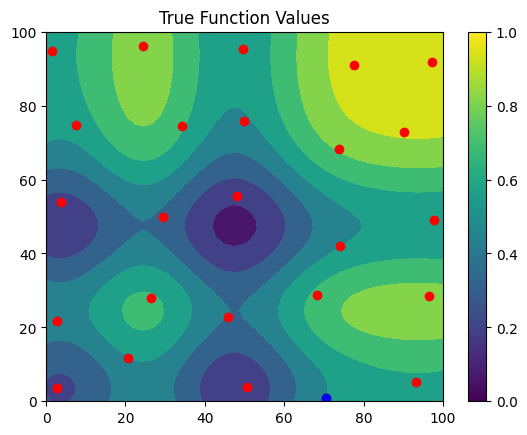

In [ ]:
agent_index = 3
Z_pred = np.zeros(XY.shape[0])
Z_pred += drones[agent_index].predict(XY)
Z_pred = Z_pred.reshape(X.shape)
plt.contourf(X, Y, Z_pred, cmap='viridis')
plt.scatter(drone_positions[:, 0], drone_positions[:, 1], c='red', label='Drones')
plt.scatter(drone_positions[agent_index, 0], drone_positions[agent_index, 1], c='blue', label='Drone 0')
plt.colorbar()
plt.title('True Function Values')
plt.show()

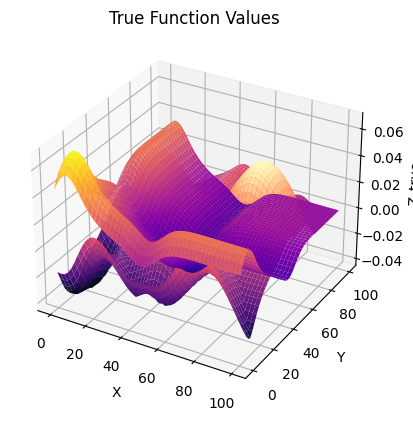

In [ ]:
fig = plt.figure()
Z_pred = Z_pred / np.linalg.norm(Z_pred)
Z_true = Z_true / np.linalg.norm(Z_true)
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z_pred, cmap='plasma')
ax.plot_surface(X, Y, Z_true - Z_pred, cmap='magma')
ax.set_title('True Function Values')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z_true')
plt.show()

In [ ]:
max_pred = np.max(Z_pred)
print(max_pred)
max_true = np.max(Z_true)
print(max_true)

2.069077434740131e-14
1.9980874821347183
